# Dimensionality Reduction

Dimensionality reduction is a key data pre-processing technique. You will perform PCA, a popular dimensionality reduction technique to MNIST data to see how it performs.

In [1]:
%matplotlib inline 

#Array processing
import numpy as np

#Data analysis, wrangling and common exploratory operations
import pandas as pd
from pandas import Series, DataFrame

#For visualization. Matplotlib for basic viz and seaborn for more stylish figures + statistical figures not in MPL.
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.core.display import Image

from sklearn.datasets import fetch_mldata                                                                       
from sklearn.utils import shuffle                                                                                                                                                                      
from sklearn import metrics
from sklearn.svm import SVC, LinearSVC , SVR 
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier                                                       
from sklearn.model_selection import KFold, train_test_split, cross_val_score, GridSearchCV                                                
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

import pydot, io
import time

#######################End imports###################################


/usr/local/lib/python3.7/site-packages/matplotlib/__init__.py:886: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))


/usr/local/lib/python3.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function fetch_mldata is deprecated; fetch_mldata was deprecated in version 0.20 and will be removed in version 0.22
  warnings.warn(msg, category=DeprecationWarning)
/usr/local/lib/python3.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function mldata_filename is deprecated; mldata_filename was deprecated in version 0.20 and will be removed in version 0.22
  warnings.warn(msg, category=DeprecationWarning)


<Figure size 432x288 with 0 Axes>

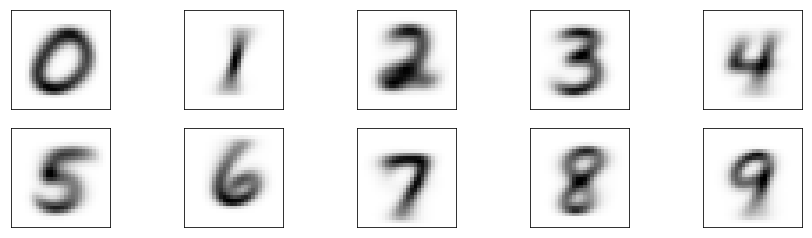

In [2]:
####################Do not change anything below
#Load MNIST data. fetch_mldata will download the dataset and put it in a folder called mldata. 
#Some things to be aware of:
#   The folder mldata will be created in the folder in which you started the notebook
#   So to make your life easy, always start IPython notebook from same folder.
#   Else the following code will keep downloading MNIST data
mnist = fetch_mldata("MNIST original") 
                                                                                                             
#In order to make the experiments repeatable, we will seed the random number generator to a known value
# That way the results of the experiments will always be same
np.random.seed(1234)                        

# Recall that we previously used shuffle and assigned first 5000 data as training and remaining as testing
# Here is another way to do this
# Here we are using a function in cross validation module to split 
# By convention, let us use a 70/30 split
train_data, test_data, train_labels, test_labels = \
        train_test_split(mnist.data, mnist.target, test_size=0.3)

#The images are in grey scale where each number is between 0 to 255
# Now let us normalize them so that the values are between 0 and 1. 
# This will be the only modification we will make to the image
train_data = train_data / 255.0                                        
test_data = test_data / 255.0

# Plot the average value of all digits
plt.figure()
fig,axes = plt.subplots(2, 5, figsize=(15,4))

for i in range(10):
    row, col = i // 5, i%5
    
    #Change below: Subset p3_train_data with images for digit i only 
    # Possible to do it 1 liner (similar to how it is done in Pandas)
    digit_i_subset = train_data[train_labels == i]

    #Change below: compute avg value of t3a_digit_i_subset
    # remember to use a vectorized version of mean for efficiency
    digit_i_subset_mean = np.mean(digit_i_subset, axis=0)

    #Do not change below
    axes[row][col].imshow( digit_i_subset_mean.reshape(28, 28), cmap="Greys") 
    axes[row][col].grid(False)
    axes[row][col].get_xaxis().set_ticks([])
    axes[row][col].get_yaxis().set_ticks([])

### Exercise 7: Dimensionality Reduction (25 marks)

- Task 7a: Train a multi-class classifier (OneVsRest) with LinearSVC class and make predictions and print the training time and classification accuracy on the test set. (5 marks)

- Task 7b: Perform PCA with 100 components on the training data, map both training and test data into 100-dimensional space by PCA, train a multi-class classifier (OneVsRest) with LinearSVC class using the trainformed training data, make predictions and print the training time and the classification accuracy on the test set. (10 marks)

- Task 7c: One way to determine how much components needs for PCA is to find the smallest value such that it explained 95% of the variance. Using the PCA results obtained above, print the cumulative variance that is explained by 100 components. (10 marks)

In [3]:
# Task t7a (5 marks)
# Train a multi-class classifier (OneVsRest) with LinearSVC class and make predictions
# Print the training time and classification accuracy on the test set
# Write your code here

import time

# Recording the start time
training_start_time = time.clock()

one_vs_rest_linear_svc_model = OneVsRestClassifier(LinearSVC(random_state=0)).fit(train_data, train_labels)

# Recording the end time
training_end_time = time.clock()


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:9: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "th

In [4]:
print("Time taken to train {0:0.2f} seconds.".format(training_end_time - training_start_time))

Time taken to train 74.38 seconds.


In [5]:
accuracy = one_vs_rest_linear_svc_model.score(test_data, test_labels)
print("Accuracy of the classifier: {0:0.2f} %".format(accuracy * 100))

Accuracy of the classifier: 91.17 %


In [13]:
# Task t7b (10 marks)
# Perform PCA on the training data and map both training and test data into 100-dimensional space by PCA, 
# Train a multi-class classifier (OneVsRest) with LinearSVC class using the trainformed training data,
# Print the training time and classification accuracy on the test set
# Remember that MNIST images are 28x28 => 784 features.

# You might want to check http://scikit-learn.org/stable/modules/decomposition.html#decompositions for details
# Write your code below

N_COMPONENTS = 100

pca = PCA(n_components = N_COMPONENTS).fit(train_data)

In [14]:
train_data_pca = pca.transform(train_data)
test_data_pca = pca.transform(test_data)

In [15]:
# Recording the start time
training_start_time = time.clock()

pca_one_vs_rest_linear_svc_model = OneVsRestClassifier(LinearSVC(random_state=0)).fit(train_data_pca, train_labels)

# Recording the end time
training_end_time = time.clock()


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  
/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", 

In [16]:
print("Time taken to train {0:0.2f} seconds.".format(training_end_time - training_start_time))

Time taken to train 61.52 seconds.


In [17]:
accuracy = pca_one_vs_rest_linear_svc_model.score(test_data_pca, test_labels)
print("Accuracy of the classifier: {0:0.2f} %".format(accuracy * 100))

Accuracy of the classifier: 90.71 %


The accuracy is **0.46%** worse off whilst using PCA compared to whilst using the raw data. However, the amount of data that needs to be stored is SIGNIFICANTLY less. This results in lower storage spaces. Furthermore, the amount of time taken for the PCA training is 61.52 seconds compared to 74.38 seconds. The time difference of 12.68 seconds is huge. Compared to the non-PCA training time, this is a **17%** speed up.

(array([32., 14., 10.,  6.,  4.,  4.,  2.,  3.,  3.,  1.,  1.,  2.,  2.,
         0.,  1.,  1.,  2.,  0.,  0.,  0.,  2.,  0.,  0.,  1.,  0.,  0.,
         0.,  1.,  1.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,
         0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([0.00096416, 0.00192539, 0.00288662, 0.00384785, 0.00480908,
        0.00577031, 0.00673155, 0.00769278, 0.00865401, 0.00961524,
        0.01057647, 0.01153771, 0.01249894, 0.01346017, 0.0144214 ,
        0.01538263, 0.01634386, 0.0173051 , 0.01826633, 0.01922756,
        0.02018879, 0.02115002, 0.02211125, 0.02307249, 0.02403372,
        0.02499495, 0.02595618, 0.02691741, 0.02787864, 0.02883988,
        0.02980111, 0.0307

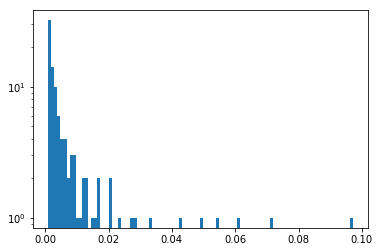

In [18]:
# Task t7c (10 marks)

# One way to determine how much components needs for PCA is to find the smallest value 
# such that it explained 95% of the variance. 
# Using the PCA results obtained above, print the cumulative variance that is explained 
# by 100 components.
# Write your code below
plt.hist(pca.explained_variance_ratio_, bins=N_COMPONENTS, log=True)

With using **100** components for the PCA, the cumulative variance works out to be approximately **0.91**. To get to the required variance of **0.95**, **154** components need to be used. The number of components required for this small, 0.03 rise is 54. 

In [19]:
print("The cumulative variance when using {} components is {}.".format(N_COMPONENTS, pca.explained_variance_ratio_.sum()))

The cumulative variance when using 100 components is 0.9147150211000548.
